# ラプラス正則化による半教師あり学習

In [1]:
import sys,os
sys.path.append(os.pardir)
from tools.models.classifiers.laplacian_regularization_classifier import LaplacianRegularizationClassifier

In [2]:
import numpy as np

In [3]:
def generate(n,seed=None):
    pos_n=n//2
    neg_n=n-pos_n
    np.random.seed(seed)
    pos = np.linspace(0, np.pi,pos_n)
    x_1 = -10*np.cos(pos)+5 + np.random.randn(pos_n)
    x_2 = -10*np.sin(pos) +np.random.randn(pos_n)
    pos_x=(-10*np.array([x_1,x_2])).T
    neg = np.linspace(0, np.pi,neg_n)
    x_1 = -10*np.cos(neg)-5 +np.random.randn(neg_n)
    x_2 = 10* np.sin(neg) +np.random.randn(neg_n)
    neg_x=(-10*np.array([x_1,x_2])).T
    X=np.concatenate([pos_x,neg_x])
    y=np.array([None]*n)
    y[pos_n]=-1
    y[pos_n-1]=1
    return X,y

In [4]:
import matplotlib.pyplot as plt

class SemiSupervisedPlotter:
    def __init__(self):
        pass
    def plot(self, X, y, title):
        """
        X data (dim = 2)
        y label {+1, None(unlabeled), -1}
        """
        plt.figure()
        x = X[y == 1]
        plt.scatter(x[:, 0], x[:, 1], c="blue",marker="o")
        x = X[y == -1]
        plt.scatter(x[:, 0], x[:, 1], c="red",marker="x")
        x = X[y == None]
        plt.scatter(x[:, 0], x[:, 1], c="black",marker=".")
        plt.title(title)
        plt.show()


In [5]:
N=200
SEED=0

In [6]:
X,y=generate(N,SEED)

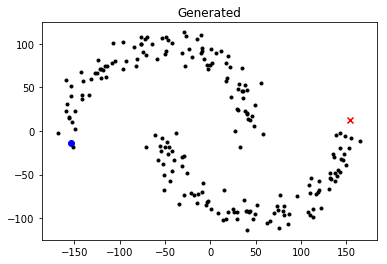

In [7]:
plotter=SemiSupervisedPlotter()
plotter.plot(X,y,"Generated")

In [8]:
model=LaplacianRegularizationClassifier(lam=1,nu=1,h_w=1000,h_m=1000)

In [9]:
model.fit(X,y)

In [10]:
model.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])